In [91]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv(r'C:\Users\trash\Downloads\Hackathon\train_F3fUq2S.csv')
data.head(3)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769


In [93]:
for i in data.columns:
    print(data[i].unique())

# As we see Column "campaign_id" is useless for creating model as it does not add any intrinsic Value to our Model and 
# "is_timer" column only contains single input i.e 0 so we can remove this column as it useless column

[   1    2    3 ... 1886 1887 1888]
[ 3 10  0  2 14 12 15  7 11  9  1  6]
[ 76  54  59  74  80  60  89  77  78  82  86  91  83  71  57  70  69  93
  42  85 104 124  81  88  73  65  87  97  90 103  79  67  92  98  25 100
  94 116  63 110  40  68  64  84  62  75 118  96  72  61 102  53 121  95
 106 113  99 125 115  52 107 111 109  58  66 112  44 161  55 167  47 101
 179 177 120  50  45 159 168  56 211 105 202 122 126 123 114 108 131 127
 117 134 133 145  48  49 157 129 130 149  37 135  51 136 220 165 186 225
 205  31 119 128 132 265 160 166 156 197  43 204  36  46 138 194 222  41
 198 181 187  28 189 163 188 208 212 192 233  35 182 185 151 162  27  26
  39  29  23  14 207  17   9  15 214 199 218 173 174 158 146 164 169 170
  30 261 216 254 209  38 171 172]
[10439  2570 12801 ... 10535 10537 11050]
[ 39 256  16  30  27  17  14  26  36  33  19  32  29  22  44  46  51  48
  24  20  34  37  25  35  42  50  18  41  13  88  86  45  81  23 160  21
  38  43 111  11 112  15  66  89  49  28  69  4

In [94]:
# Dropping Both of the Columns listed Above
data = data.drop(['campaign_id','is_timer'],axis=1)

In [95]:
# Checking the shape of Remaining Dataset
data.shape

(1888, 20)

In [96]:
# Checking the Datatype of each Independent Variable in dataset and looking for all inde. variables with "OBJECT" Datatype to
# convert them to 'int' or 'float' for further steps to be taken using One Hot Encoding or Label Encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   object 
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_emoticons        1888 non-null   int64  
 15  is_discount         1888 non-null   int64  
 16  is_pri

In [97]:
# Checking for NULL values in all Dataset
data.isnull().sum()

sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [98]:
# Checking the Unique Labels inside a Independent Variable of Datatype "Object"
data['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [99]:
# Looking into Abnormalities in Values of Dataset
data.describe()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [100]:
# Importing Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing full Dataset     
The below graph is BARPLOT i.e to show relationship between Numerical and Categorical Variables in Dataset /n  
    BI-VARIATE ANALYSIS

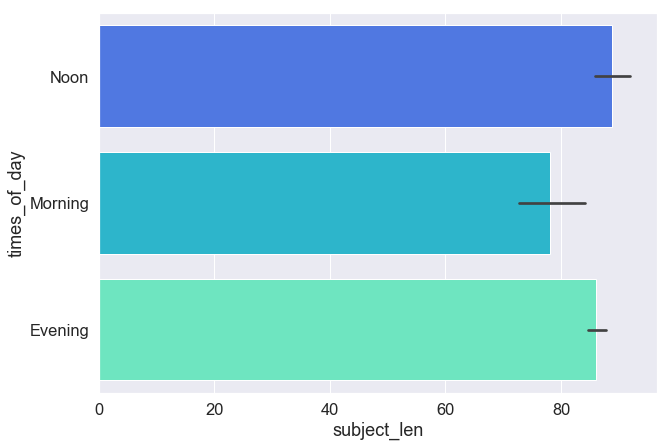

In [101]:
sns.set(palette='rainbow',font_scale=1.5,style = 'darkgrid',rc={"figure.figsize": [10, 7]})
sns.barplot(data['subject_len'],data['times_of_day']);

### Comments
1. From the Graph above we can see the Subject Length is almost same for Evening and Noon and slight less in Morning

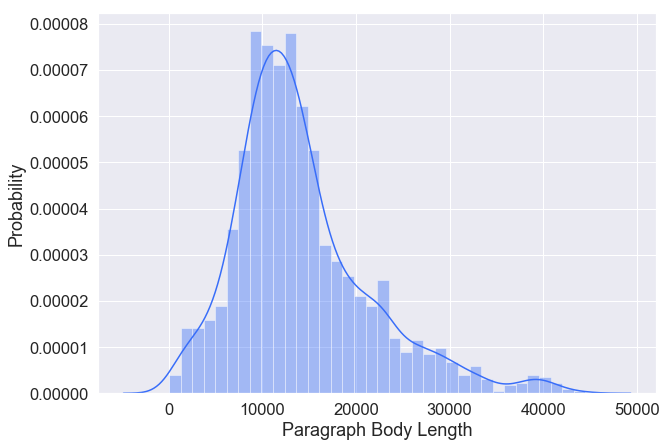

In [102]:
sns.distplot(data['body_len'],axlabel='Paragraph Body Length').set_ylabel("Probability");

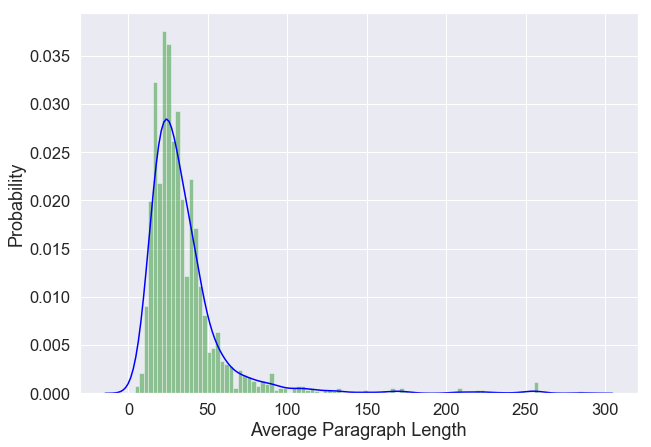

In [103]:
fig = sns.distplot(data['mean_paragraph_len'],color='green',kde_kws={'color':'blue'},bins=100,axlabel='Average Paragraph Length');
fig.set_ylabel("Probability");

### Comments
The Displot plot are used to show the Type of Distribution, Skewness and Kurtosis of the Independent Variable i.e it is UNI- VARIARE ANAYSIS

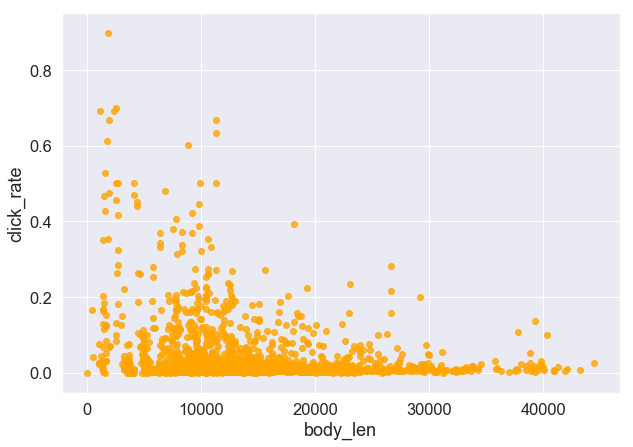

In [104]:
#sns.regplot(data['mean_paragraph_len'],data['click_rate'],color='orange',fit_reg=False);
sns.regplot(data['body_len'],data['click_rate'],color='orange',fit_reg=False);

### Comments
Here we have plotted Scatter(Regression) Plot betweeen 'body_len' and dependent variable 'click_rate' which indicates body_len between 6000 and 15000 have majority body_len overall for all data having click_rate mostly between 0.0 and 0.275 

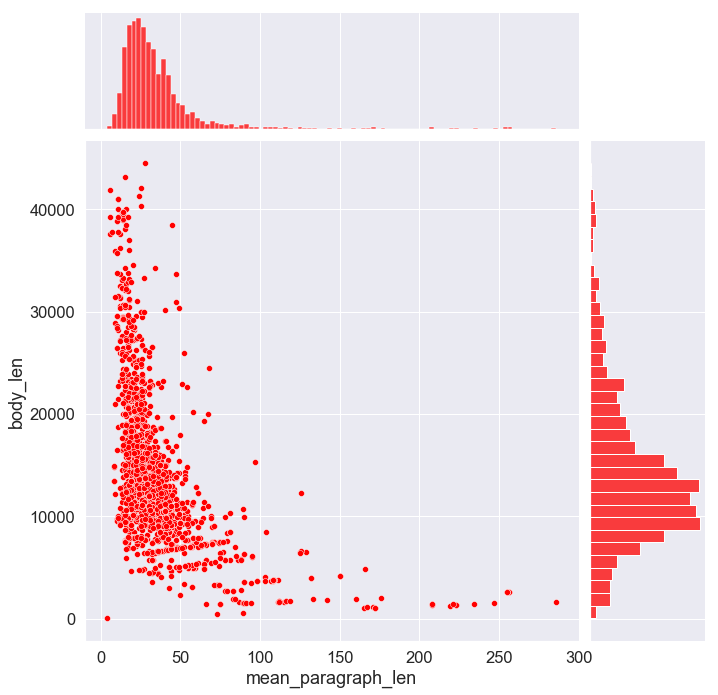

In [105]:
sns.jointplot(data['mean_paragraph_len'],data['body_len'],size=10,ratio=4,space=0.1,color = 'red');

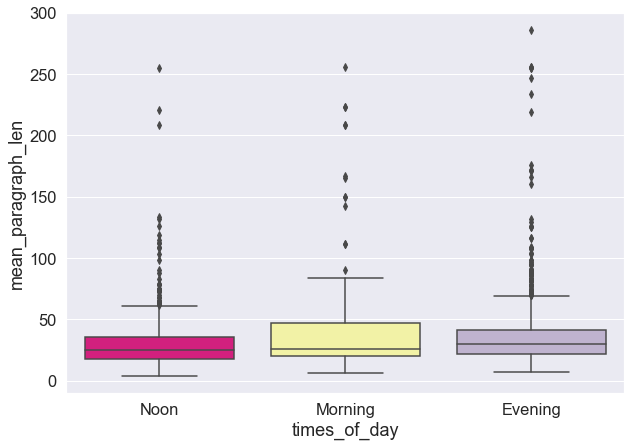

In [106]:
sns.boxplot(data['times_of_day'],data['mean_paragraph_len'],palette='Accent_r');

In [107]:
# Converting Categorical Variable into dummy integer values as it was Nominl Variable we used ONE HOT ENCODING i.e pandas inbuilt
# function for One Hot Encoder and removed First Category as it would have created DUMMY VARIABLE TRAP
data['times_of_day'] = pd.get_dummies(data['times_of_day'],drop_first=True)

In [108]:
# Converting values of newly converted values from 'uint8' to 'int'
data['times_of_day'] = data['times_of_day'].astype(int)

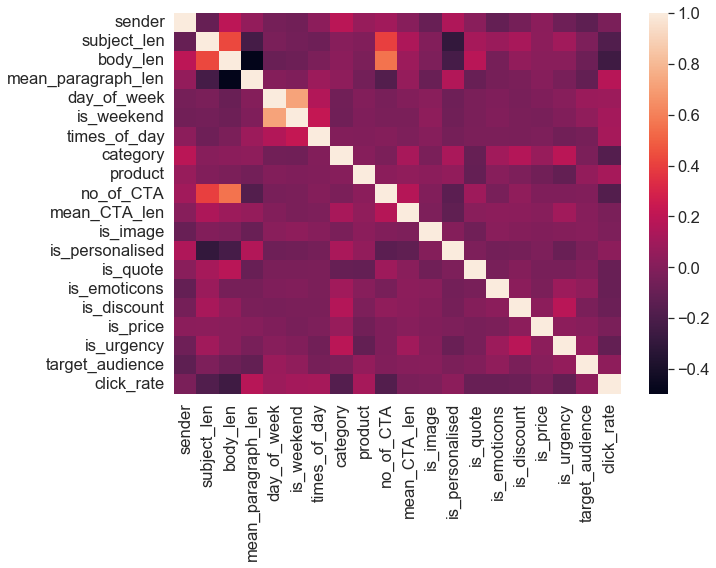

In [109]:
# Checking Correlation between Variables by plotting HeatMap, if Visually the correlation would have been found to be more than 
# 0.9 then I would have used a function to clear one of the columns correlated to other column, as in this dataset it is visible
# that no 2 variable are that much related so we move forward and for "days_of_week" and "is_weekend" Variables the correlation  
# is around 0.723 i.e less than threshold so we ignore them.
sns.heatmap(data.corr())

In [110]:
# Separating Dependent Variable i.e Label from Independent variables i.e Features
X_train = data.drop('click_rate',axis =1)
y_train = pd.DataFrame(data['click_rate'])

In [111]:
print(y_train.shape)
print(X_train.shape)

(1888, 1)
(1888, 19)


### Here we are using Feature Selection method i.e VarianceThreshold, kept threshold at 10% and removing all Independent Variables having variance less than 10%, this way we will keep only useful variable for Model building and removing useless variables which don't add any meaning to Model

In [112]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.10)
var_thr.fit(X_train)

VarianceThreshold(threshold=0.1)

In [113]:
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True])

In [114]:
var_threshold_col = [column for column in X_train.columns 
          if column not in X_train.columns[var_thr.get_support()]]

# Printing out all Predictors having Variance less than 10 %
for features in var_threshold_col:
    print(features)

times_of_day
is_personalised
is_discount
is_urgency


In [115]:
# Removing all features from X_train which have variance less than 10%
X_train = X_train.drop(var_threshold_col,axis =1)

In [116]:
from sklearn.metrics import r2_score

#### Uploading the X_test csv file and implementing all operation done on X_train data so that the features and rows should match in both X_train and X_test and then making Prediction on X_test data and saving that to a csv for Evaluation from True Y_test

In [117]:
test = pd.read_csv(r'C:\Users\trash\Downloads\Hackathon\test_Bk2wfZ3.csv')
final = pd.DataFrame(test['campaign_id'])
X_test = test.drop(['campaign_id','is_timer'],axis =1)
X_test['times_of_day'] = pd.get_dummies(X_test['times_of_day'],drop_first=True)
X_test['times_of_day'] = X_test['times_of_day'].astype(int)
X_test = X_test.drop(var_threshold_col,axis = 1)

In [118]:
X_train.head(3)

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,is_emoticons,is_price,target_audience
0,3,76,10439,39,5,1,6,26,3,29,0,0,0,0,14
1,3,54,2570,256,5,1,2,11,0,22,0,0,0,0,10
2,3,59,12801,16,5,1,2,11,3,23,1,1,0,0,16


In [124]:
# Creating Regression Model
# We are using Ensembles Technique here, so need of Scaling the features
# Here taking XGBoost Regressor, KNRegressor, RandomForestRegressor as the base estimators with optimum parameters
# Tried out all individual Models using HPT by Grid and Random SearchCV and they are performing with r2 over 99% on train data only
# Here i have taken the best values of parameters as I have done HPT in some other code file uploaded to submission
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor(n_estimators = 1500,max_depth = 18,learning_rate = 0.01)
knn = KNeighborsRegressor(weights = 'distance',algorithm='auto',p=2,n_neighbors=71)
rfr = RandomForestRegressor(max_features='sqrt',criterion = 'friedman_mse',n_estimators=1000)
lgbm = LGBMRegressor(boosting_type='gbdt',learning_rate= 0.9,n_estimators=3000,num_leaves=32)
ctb = CatBoostRegressor(silent=True,task_type='GPU', objective='RMSE', n_estimators=5000, max_depth=10,learning_rate=0.8,
                        bootstrap_type='Bayesian', bagging_temperature=6)

vr = VotingRegressor([('XG Boost', xgb), ('K-NRegressor',knn),('RandomForestRegressor',rfr),('LightGBM',lgbm),('CatboostRegressor',ctb) ]
                     ,n_jobs = -1,)
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('XG Boost',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.01,
                                          max_delta_step=None, max_depth=18,
                                          min_child_weight=None, missing=nan,
                                          monotone_constrain...
                            ('K-NRegressor',
                             KNeighborsRegressor(n_neighbors=71,
                                                 weights='distance')),

In [125]:
r2_score(y_pred=vr.predict(X_train),y_true=y_train)

0.9954570919714801

In [126]:
y_pred_vr = vr.predict(X_test)

In [127]:
final_votingreg = pd.DataFrame(test['campaign_id'])
final_votingreg['click_rate'] = y_pred_vr

In [128]:
final_votingreg.to_csv(r'C:\Users\trash\OneDrive\Desktop\FinalSubmission_using_voting_regressor.csv',index=False)